In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sqlalchemy import create_engine

In [23]:
loc = '/data/SO_predict_DATA'

In [3]:
tag_df = pd.read_csv("tag_counts_dict_dtm.csv")
tag_df.head()

,Tags,Counts
0,mdbg,14
1,fouc,23
2,mdraid,4
3,screen-resolution,477
4,mms-streaming,10


In [4]:
tag_df.shape

(42048, 2)

In [5]:
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

In [6]:
tag_df_sorted.head()

,Tags,Counts
12780,c#,331505
30485,java,299414
12835,php,284103
22551,javascript,265423
23337,android,235436


In [13]:
print(tag_df_sorted['Counts'].describe())

count     42048.000000
mean        290.048231
std        4078.252789
min           1.000000
25%           5.000000
50%          17.000000
75%          66.000000
max      331505.000000
Name: Counts, dtype: float64


In [16]:
tag_df_sorted[tag_df_sorted['Counts'] > 66].count()

Tags      10500
Counts    10502
dtype: int64

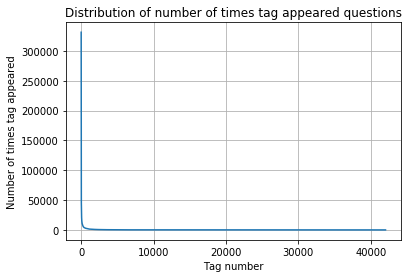

In [15]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared questions")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

In [31]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(loc+db_file)
        return conn
    except sqlite3.Error as e:
        print(e)
 
    return None

In [32]:
tag_df_sorted.Tags.to_csv('hai',index = None)


In [35]:
con = no_dup_con = create_connection('/train_no_dup.db')
if con is not None:
    ran_data = pd.read_sql_query("SELECT Title, Body, Tags From no_dup_train ORDER BY RANDOM() LIMIT 10000;",con)
    print(type(ran_data))
else:
    print("Connection Error")

<class 'pandas.core.frame.DataFrame'>


In [40]:
disk_engine = create_engine('sqlite:///'+loc+'/random_train.db')
ran_data.to_sql('data',disk_engine)

In [42]:
con = no_dup_con = create_connection('/random_train.db')
if con is not None:
    ran_data2 = pd.read_sql_query("SELECT Title, Body, Tags From data;",con)
    print(type(ran_data))
else:
    print("Connection Error")

<class 'pandas.core.frame.DataFrame'>


In [43]:
ran_data2.shape

(10000, 3)

In [ ]:
 S